In [5]:
# Importing  all the functions defined in functions.py
from functions import *

In [23]:
# from numpy import * 

# model setup
n_iter = 10
t_max = 150 # how many days will the simulation run
n_hh = 1000
type_of_hh_array = [0, 1, 2]
prob_type_of_hh_array = [0.33, 0.33, 0.34]
mean_hh_size_array = [2, 4, 6]
initial_prob_I_array = [0.01, 0.01, 0.01]
mean_n_contacts_outside_hh = np.array([[5, 4, 2], [2, 5, 2], [2, 2, 8]])

p_drop_contact = [0.9, 0.5, 0.2]
t_drop_contact = 30

# transmission parameters
max_recovery_t = 10 # assuming person definitely recovers by these many days
p_max = 0.02 # probability of infecting someone upon contact on most infectious day
mean_gamma = 3.86
sd_gamma = 2.65


In [24]:
# calculating probability of infecting someone upon contact given the no. of days since infection.
p_t = cal_prob_of_inf(p_max, mean_gamma, sd_gamma, t_inf_max = max_recovery_t)

#define x-axis values
t = np.linspace (0, max_recovery_t, max_recovery_t+1) 

# import matplotlib.pyplot as plt
# #create plot of Gamma distribution
# plt.plot(t, p_t)

In [25]:
# running the simulations and the output is saved in csv files
sim(n_iter_input = n_iter, n_hh_input = n_hh, type_of_hh_array_input = type_of_hh_array, \
    prob_type_of_hh_array_input = prob_type_of_hh_array, mean_hh_size_array_input = mean_hh_size_array, \
    initial_prob_I_array_input = initial_prob_I_array, \
    mean_n_contacts_outside_hh_input = mean_n_contacts_outside_hh, \
    t_max_input = t_max, max_recovery_t_input = max_recovery_t, p_t_input = p_t, \
    p_drop_contact_input = p_drop_contact, t_drop_contact_input = t_drop_contact)

adjacency graph created
Simulation  1  is complete.
adjacency graph created
Simulation  2  is complete.
adjacency graph created
Simulation  3  is complete.
adjacency graph created
Simulation  4  is complete.
adjacency graph created
Simulation  5  is complete.
adjacency graph created
Simulation  6  is complete.
adjacency graph created
Simulation  7  is complete.
adjacency graph created
Simulation  8  is complete.
adjacency graph created
Simulation  9  is complete.
adjacency graph created
Simulation  10  is complete.


In [26]:
# list_hh_ind_input = create_hh(n_hh_input = n_hh, type_of_hh_array_input = type_of_hh_array, \
#                               prob_type_of_hh_array_input = prob_type_of_hh_array, \
#                               mean_hh_size_array_input = mean_hh_size_array, \
#                               initial_prob_I_array_input = initial_prob_I_array)

# n_ind_input = len(list_hh_ind_input[1])

# graph = create_adjacency_list(list_hh_ind_input = list_hh_ind_input, n_hh_input = n_hh, \
#                                     n_ind_input = n_ind_input, type_of_hh_array_input = type_of_hh_array, \
#                                     mean_n_contacts_outside_hh_input = mean_n_contacts_outside_hh)


In [27]:
# view_input_observed_contact_matrices(graph_input = graph, type_of_hh_array_input = type_of_hh_array, \
#                                      mean_n_contacts_outside_hh_input = mean_n_contacts_outside_hh, \
#                                      mean_hh_size_array_input = mean_hh_size_array)

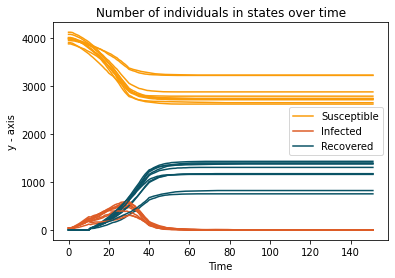

In [28]:
# importing outputs
import pandas as pd

dat = pd.read_csv('sim.csv')

# ploting S, I, R dynamics over time
import matplotlib.pyplot as plt

for i in range(1,n_iter+1): 
    dat_temp = dat.loc[dat['iter '] == i]
    
    # x axis values
    x = dat_temp[['time']]
    # corresponding y axis values
    S = dat_temp[['S']]
    I = dat_temp[['I']]
    R = dat_temp[['R']]

    # plotting the points
    plt.plot(x, S, '#FA9C0A', label = "Susceptibles")
    plt.plot(x, I, '#DD5C27', label = "Infected")
    plt.plot(x, R, '#0A5365', label = "Recovered")


    # naming the x axis
    plt.xlabel('Time')
    # naming the y axis
    plt.ylabel('y - axis')

# giving a title to my graph
plt.title('Number of individuals in states over time')
# show a legend on the plot
plt.legend(['Susceptible','Infected','Recovered'])
# function to show the plot
plt.show()



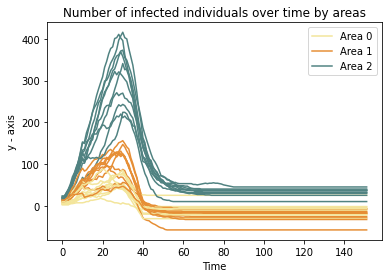

In [29]:
# COLORS ARE FROM http://colormind.io/

# importing outputs
import pandas as pd

dat_infs = pd.read_csv('infs.csv')

# ploting I dynamics over time by area
import matplotlib.pyplot as plt

for i in range(1,n_iter+1): 
    dat_temp = dat_infs.loc[dat_infs['iter '] == i]
    
    # x axis values
    t = dat_temp[['time']]
    # corresponding y axis values
    I_0 = dat_temp[['area_0']]
    I_1 = dat_temp[['area_1']]
    I_2 = dat_temp[['area_2']]

    # plotting the points
    plt.plot(t, I_0, '#F3E59B', label = "Area 0")
    plt.plot(t, I_1, '#E68E35', label = "Area 1")
    plt.plot(t, I_2, '#508281', label = "Area 2")


    # naming the x axis
    plt.xlabel('Time')
    # naming the y axis
    plt.ylabel('y - axis')

# giving a title to my graph
plt.title('Number of infected individuals over time by areas')
# show a legend on the plot
plt.legend(['Area 0','Area 1','Area 2'])
# function to show the plot
plt.show()



In [ ]:
import pandas as pd

colnames = ['infector_ID', 'infector_type_of_hh', 'infectee_ID', 'infectee_type_of_hh', 'time', 'iter']
df = pd.read_csv('test.csv', names = colnames)
df = df.iloc[1: , :] # dropping first row (these are column headings now)
df = df.loc[df['iter'] == '1']

In [ ]:
import networkx as nx
import matplotlib as plt

# fig, ax = plt.subplots(figsize=(15, 8))
# initialising graph
I = nx.Graph()

# creating edge list (reading it from the output)
edge_list = list(df[['infector_ID', 'infectee_ID']].apply(tuple, axis=1))
I.add_edges_from(edge_list)

df1 = df[['infector_ID', 'infector_type_of_hh']]
df1.columns = ['node', 'type_of_hh']
df2 = df[['infectee_ID', 'infectee_type_of_hh']]
df2.columns = ['node', 'type_of_hh']

frames = [df1, df2]

df3 = pd.concat(frames)
df3 = df3.drop_duplicates()

car = df3

# Make types into categories
car = car.set_index('node')

car['type_of_hh'] = pd.Categorical(car['type_of_hh'])

 
# Specify colors
cmap = plt.colors.ListedColormap(['C0', 'darkorange', 'green'])

# drawing network
nx.draw(I, with_labels=False, node_color=car['type_of_hh'].cat.codes, cmap = cmap)



In [ ]:
# printing output of contacts 
list_ind = []
list_type_of_hh = []
list_hh_size = []
list_n_same_hh = []
list_n_same_area = []
list_n_outside_area = []
list_n_total = []

for i in range(n_ind_input):
    ind_temp = list(graph.m_adj_list.keys())[i].get_ID()
    list_ind.append(ind_temp)
    
    type_of_hh_temp = list(graph.m_adj_list.keys())[i].get_type_of_hh()
    list_type_of_hh.append(type_of_hh_temp) 
    
    hh_size_temp = int(list(graph.m_adj_list.keys())[i].get_hh_size())
    list_hh_size.append(hh_size_temp)
       
    n_same_hh_temp = len(list(filter(lambda x: x[1] == "same_hh", graph.m_adj_list[list(graph.m_adj_list.keys())[i]])))
    list_n_same_hh.append(n_same_hh_temp)
    
    n_same_area_temp = len(list(filter(lambda x: x[1] == "same_area", graph.m_adj_list[list(graph.m_adj_list.keys())[i]])))
    list_n_same_area.append(n_same_area_temp)
    
    n_outside_area_temp = len(list(filter(lambda x: x[1] == "outside_area", graph.m_adj_list[list(graph.m_adj_list.keys())[i]])))
    list_n_outside_area.append(n_outside_area_temp)
    
    n_total_temp = len(graph.m_adj_list[list(graph.m_adj_list.keys())[i]])
    list_n_total.append(n_total_temp)

    
contact_list = [list_ind, list_type_of_hh, list_hh_size, list_n_same_hh, list_n_same_area, list_n_outside_area, list_n_total]


# Convert output to a dataframe
import pandas as pd

contact_list_df = []
contact_list_df = pd.DataFrame(contact_list).transpose()
contact_list_df.rename(columns={0:"ID", 1: "type_of_hh", 2:"hh_size", 3:"contacts_within_hh", 4:"contacts_within_area", 5:"contacts_outside_area", 6: "contacts_total"}, inplace = True)

pd.set_option("display.max_rows", None, "display.max_columns", None)

display(contact_list_df)



In [ ]:
from matplotlib import pyplot as plt

groups = contact_list_df.groupby("type_of_hh")
for name, group in groups:
    plt.hist(group["hh_size"], label=name, alpha = 0.5)
    plt.xlabel('Household size')
    plt.ylabel('Frequency')
plt.legend()